In [51]:
# Install TensorFLow
!pip install tensorflow==2.2.0

     |████████████████████████████████| 175.3 MB 7.8 kB/s eta 0:00:01    |██                              | 11.5 MB 2.8 MB/s eta 0:00:59     |██▎                             | 12.3 MB 3.0 MB/s eta 0:00:56     |███                             | 16.4 MB 3.0 MB/s eta 0:00:54     |██████▍                         | 35.3 MB 4.9 MB/s eta 0:00:29     |████████▊                       | 47.6 MB 2.2 MB/s eta 0:00:57     |████████▊                       | 47.7 MB 4.7 MB/s eta 0:00:27     |█████████▏                      | 50.5 MB 4.7 MB/s eta 0:00:27     |███████████▍                    | 62.5 MB 1.9 MB/s eta 0:01:01     |█████████████                   | 71.2 MB 13.1 MB/s eta 0:00:08     |████████████████▊               | 91.6 MB 1.3 MB/s eta 0:01:06     |██████████████████▊             | 102.4 MB 2.6 MB/s eta 0:00:28     |██████████████████████████▍     | 144.7 MB 2.1 MB/s eta 0:00:15     |███████████████████████████████▎| 171.2 MB 2.2 MB/s eta 0:00:02��████████████▉| 174.3 MB 2.1 MB/s eta 0:00:

In [52]:
import tensorflow as tf
#
import numpy as np
#
import matplotlib.pyplot as plt
#
import math
#

In [53]:
print("TensorFlow version", tf.__version__)

TensorFlow version 2.0.0


## Generating Sample Data

In [54]:
# Generate sample datapoints
SAMPLES = 1000
SEED = 1337

In [55]:
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [56]:
# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2n, wich covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

In [57]:
# Shuffle the values to garantee they're not in order
np.random.shuffle(x_values)

In [6]:
# Calculate the correspding sine values
y_values = np.sin(x_values)

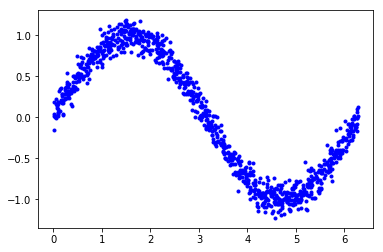

In [58]:
# Plot the data, in blue.
plt.plot(x_values, y_values, 'b.')
plt.show()

In [59]:
# Add small randomness...
y_values += 0.1 * np.random.randn(*y_values.shape)

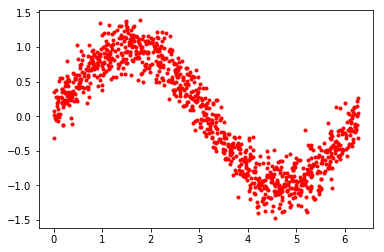

In [60]:
# Re-plot (4-10)
plt.plot(x_values, y_values, 'r.')
plt.show()

## Splitting the data

In [61]:
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int((0.2 * SAMPLES) + TRAIN_SPLIT)

In [62]:
print(TEST_SPLIT)

800


In [63]:
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

In [13]:
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES

Plot the data in each partition in different colors

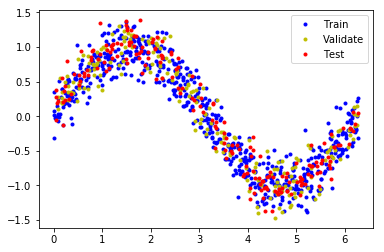

In [64]:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

### Now defining a Basic Model

In [65]:
# Using Keras
# import tensorflow as tf
print("Reminder TF version:", tf.__version__)
#
from tensorflow.keras import layers
# from tensorflow import keras
print("Keras version:", tf.keras.__version__)
# from keras import layers
model_1 = tf.keras.models.Sequential()
#

Reminder TF version: 2.0.0
Keras version: 2.2.4-tf


##### First layer takes a scalar input and feeds it into 16 neurons.
Activation is based on **relu** activation function.

In [66]:
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

Final layer is a single neuron using a standard optimizer and loss function for regression

In [67]:
model_1.add(layers.Dense(1))

In [68]:
# Compile
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Print model's architecture
model_1.summary()
#

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


## Now training the model